In [2]:
from fastai.vision.all import *

/home/dnth/anaconda3/envs/fastdup/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
path = Path('./scene_classification/data/seg_train/')

In [5]:
path.ls()

(#6) [Path('scene_classification/data/seg_train/street'),Path('scene_classification/data/seg_train/sea'),Path('scene_classification/data/seg_train/buildings'),Path('scene_classification/data/seg_train/mountain'),Path('scene_classification/data/seg_train/forest'),Path('scene_classification/data/seg_train/glacier')]

In [6]:
block = DataBlock(
        blocks=(ImageBlock, CategoryBlock),
        get_items=get_image_files,
        splitter=RandomSplitter(valid_pct=0.2, seed=42),
        get_y=parent_label, item_tfms=[Resize(384)],
        batch_tfms=aug_transforms(mult=1.5, size=384, min_scale=0.75))

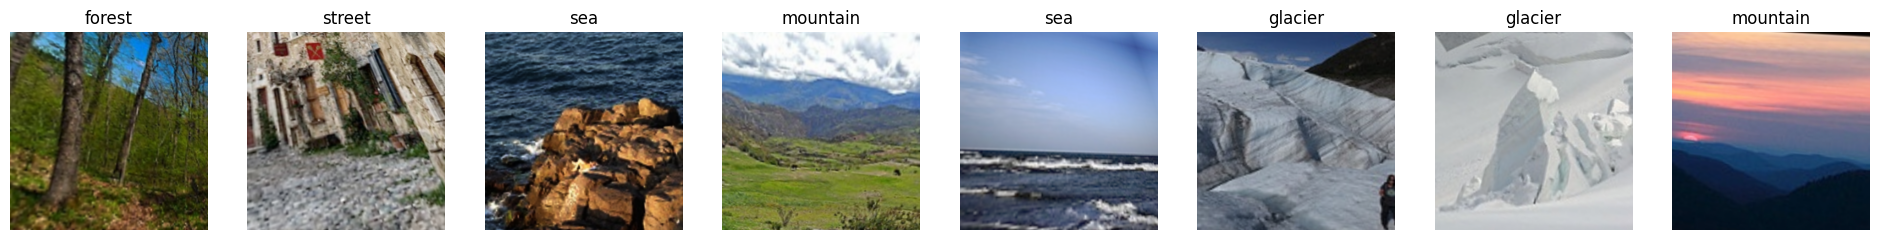

In [8]:

loaders = block.dataloaders(path)
loaders.train.show_batch(max_n=8, nrows=1)

In [9]:
learn = cnn_learner(loaders, resnet34, metrics=accuracy)

/home/dnth/anaconda3/envs/fastdup/lib/python3.9/site-packages/fastai/vision/learner.py:288: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/home/dnth/anaconda3/envs/fastdup/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/dnth/anaconda3/envs/fastdup/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


SuggestedLRs(valley=0.0008317637839354575)

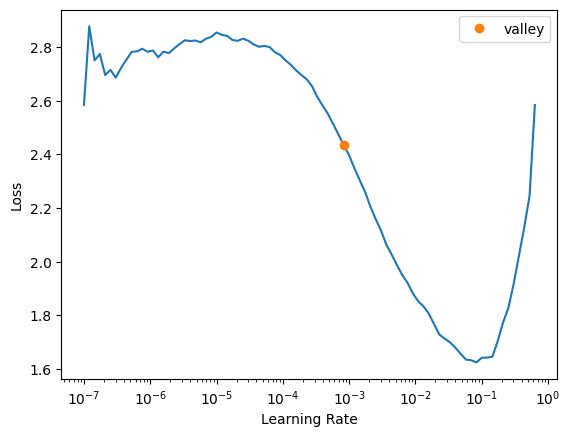

In [10]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,time
0,0.635788,0.298503,0.900214,00:50


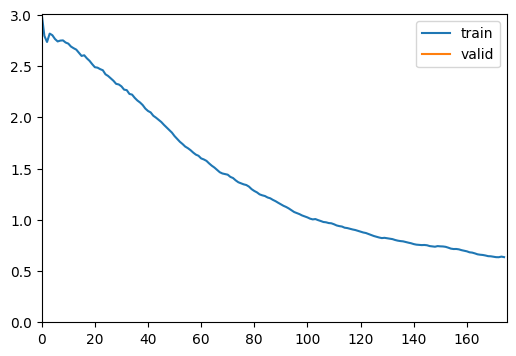

epoch,train_loss,valid_loss,accuracy,time
0,0.410583,0.260632,0.914825,01:05
1,0.329228,0.238217,0.926586,01:08
2,0.295600,0.215781,0.930862,01:15
3,0.247350,0.212111,0.938703,01:11
4,0.211337,0.183408,0.938703,01:10
5,0.201323,0.203939,0.933357,01:13
6,0.163637,0.177062,0.946187,01:15
7,0.166968,0.228117,0.928724,01:12
8,0.132984,0.212443,0.937990,01:16
9,0.097657,0.207036,0.946187,01:17


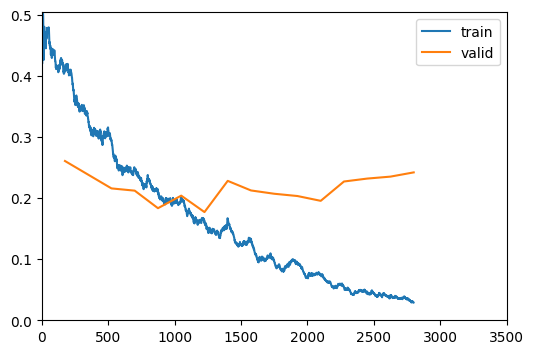

KeyboardInterrupt: 

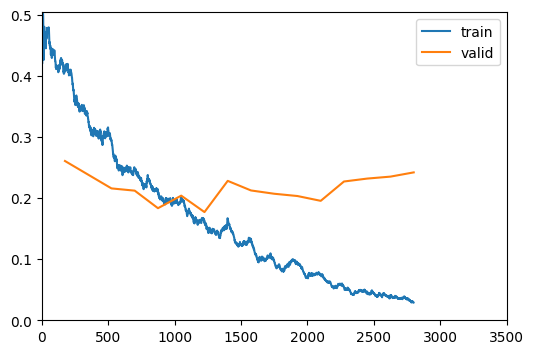

In [11]:
learn.fine_tune(5, base_lr=1e-3, cbs=[ShowGraphCallback()])